#Crescimento desenfreado e baixa adesão de energias renováveis no mundo

O crescimento desenfreado das atividades humanas tem impulsionado o aumento exponencial das emissões de dióxido de carbono (CO2), contribuindo significativamente para o agravamento das mudanças climáticas. Neste estudo, utilizamos duas bases de dados complementares: a primeira apresenta um panorama das áreas globais responsáveis pelas maiores emissões de CO2 na atmosfera, enquanto a segunda foca nos países e suas principais fontes de energia ao longo de diferentes períodos históricos. A análise revelou a predominância de fontes fósseis, como carvão, petróleo e gás natural, como matrizes energéticas em diversas regiões, evidenciando a baixa adesão às energias renováveis, mesmo em face de metas globais de sustentabilidade. Este trabalho busca oferecer insights que orientem políticas públicas e iniciativas privadas para uma transição energética mais sustentável e alinhada aos objetivos do Acordo de Paris.

Integrantes: Gustavo Akio RM:550241;
             Heitor Farias RM:551539;
             Yuri Zacarioto RM:550952

## Importando as bibliotecas

Para iniciarmos nossa análise, primeiramente teremos que importar algumas bibliotecas para nosso código funcionar, a primeira delas é o pandas para que possamos lidar com os dados como tabelas dentro do python e podermos realizar uma série de medidas para que os dados possam ser tratados. Em seguida temos a matplotlib, no qual ela e a próxima tem basicamente a mesma função que é gerar nossos gráficos para podermos ter representações visuais do que nossos dados estão nos dizendo. E temos uma biblioteca que servirá apenas para lidarmos com a série temporal que foi colocada no código para podermos mostrar os dados de forma cronológica. Por fim as bibliotecas responsáveis pela criação de ML


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Importação do primeiro dataframe e tratamentos dos dados

O primeiro passo para começarmos nossa análise foi importar a planilha que iremos retirar os dados. A primeira coisa a fazermos depois de importada e o comando .head(), ele nos garante a visualização dos 5 primeiros valores da planilha, assim como sua estrutura para assim sabermos melhor com os dados que estamos lidando



In [ ]:
df = pd.read_excel("carbon-monitor-GLOBAL-maingraphdatas.xlsx")
df.head()

,country,date,sector,MtCO2 per day
0,Brazil,01/01/2022,Domestic Aviation,0.023211
1,Brazil,01/01/2022,Ground Transport,0.165308
2,Brazil,01/01/2022,Industry,0.219204
3,Brazil,01/01/2022,International Aviation,0.008935
4,Brazil,01/01/2022,Power,0.178036


### tratamento

Após a importação nós fazemos os tratamentos dos dados, no nosso caso, apenas retiramos os valores nulos e duplicados para não atrapalhar nossos gráficos e nossos modelos de machine learning posteriormente

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df['country'].unique()

array(['Brazil', 'China', 'EU27 & UK', 'France', 'Germany', 'India',
       'Italy', 'Japan', 'ROW', 'Russia', 'Spain', 'United Kingdom',
       'United States'], dtype=object)

## Total de emissões por país

### exlicação do gráfico
Para começarmos nossa análise, nós criamos um gráfico para a demonstração dos valores de total de emissão de CO2 por dia de cada país e vale ressaltar que ROW siginifica rest of the word (resto do mundo).
Neste gráfico, podemos ver os dois principais poluentes do mundo, sendo a China e em seguida os Estados Unidos

### explicação do código

No código utilizado, basicamente fizemos três coisas, a primeira dela foi garantir que a coluna 'mtCO2 per day' fosse um número, para que pudessemos somar e ter os resultados que queriamos. Em seguida nós somamos os valores por país e renomeamos as colunas para que ficasse maais legível a planilha e por fim, geramos os gráficos que estão aparecendo na tela

<ipython-input-89-17d641041faf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_emissions, y="Country", x="Total Emissions", palette="Blues_d", orient="h")


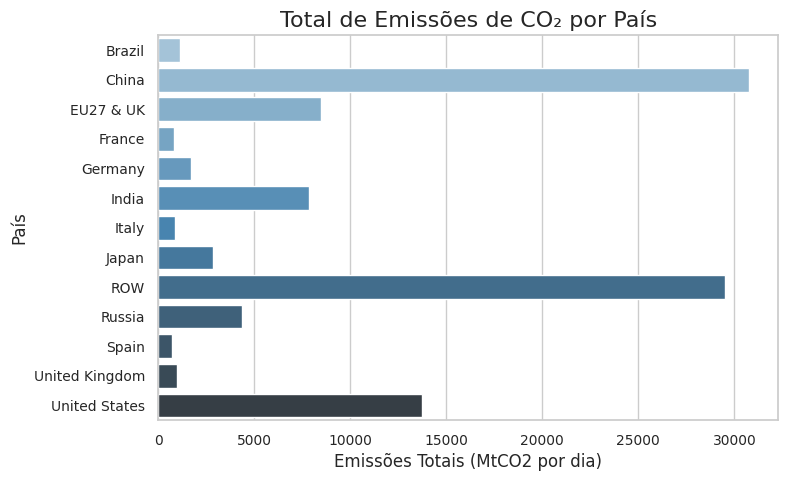

In [ ]:
df['MtCO2 per day'] = df['MtCO2 per day'].astype(float)

total_emissions = df.groupby("country")["MtCO2 per day"].sum().reset_index()

total_emissions.columns = ["Country", "Total Emissions"]

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=total_emissions, y="Country", x="Total Emissions", palette="Blues_d", orient="h")

plt.title("Total de Emissões de CO₂ por País", fontsize=16)
plt.xlabel("Emissões Totais (MtCO2 por dia)", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

## Setores mais poluentes

### explicação dos gráficos

Nesta etapa fomos ver quais eram os setores mais poluentes do mundo, no qual podemos ver que de primeira temos o setor energético, em seguida o da indústria e em terceiro de transporte. estas informações vão ser mais importantes para a análise posteriormente

Já no segudo gráfico, decidimos comparar estes valores com o Brasil, para assim podermos ter uma noção se ele acompanharia o resto do mundo neste sentido ou não. Logo de cara vemos que o setor energético do Brasil fica apenas em terceiro, onde o de transporte e a indústria ficam em primeiro e segundo lugar nesta ordem

### explicação dos códigos

Ambos os códigos apresentam uma estrutura parecida, nós apenas agrupamos os valores por setor e somamos os valores para podermos ter um resultado plotável. Na célula do Brasil, a única diferença foi que antes nós filtramos os dados para que ficassem dentro do gráfico apenas os que tivessem na coluna 'Country' o valor Brazil e assim podermos ter um resultado focado em um país

<ipython-input-90-14631a0b4e94>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_emissions, y="Sector", x="Total Emissions", palette="viridis", orient="h")


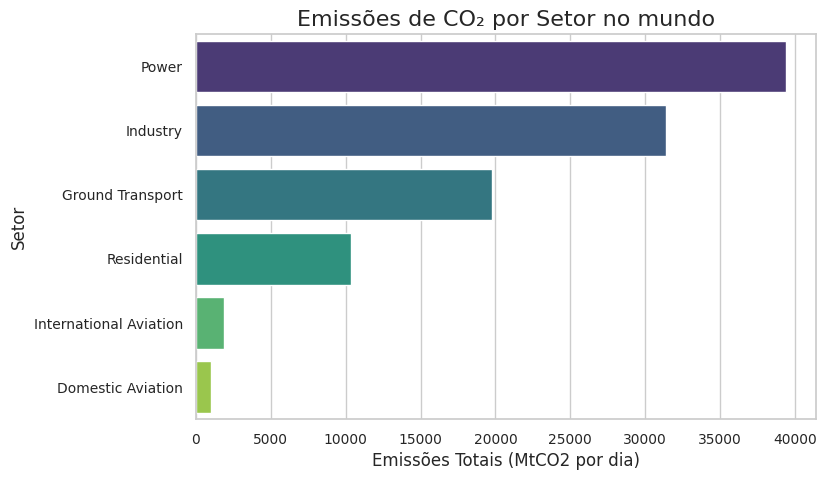

In [ ]:

sector_emissions = df.groupby("sector")["MtCO2 per day"].sum().reset_index()


sector_emissions = sector_emissions.sort_values(by="MtCO2 per day", ascending=False)


sector_emissions.columns = ["Sector", "Total Emissions"]


sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.barplot(data=sector_emissions, y="Sector", x="Total Emissions", palette="viridis", orient="h")


plt.title("Emissões de CO₂ por Setor no mundo", fontsize=16)
plt.xlabel("Emissões Totais (MtCO2 por dia)", fontsize=12)
plt.ylabel("Setor", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

<ipython-input-91-9b7fc620ca2f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_emissions, y="Sector", x="Total Emissions", palette="viridis", orient="h")


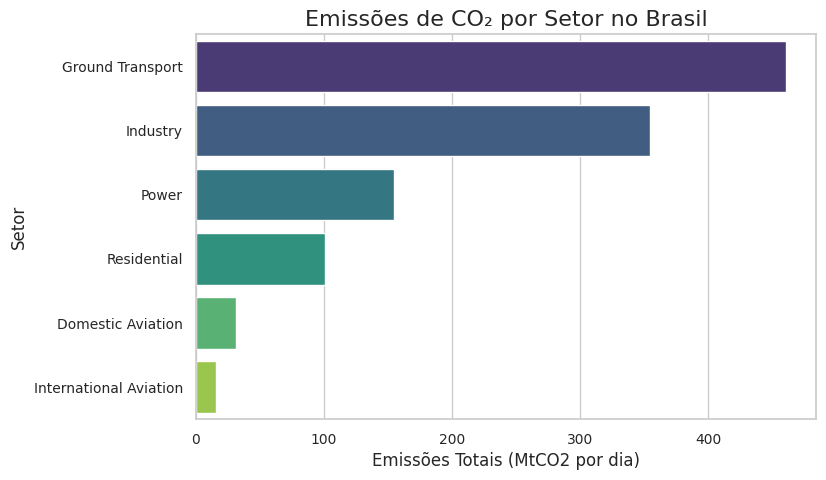

In [ ]:

df_brazil = df[df["country"] == "Brazil"]


sector_emissions = df_brazil.groupby("sector")["MtCO2 per day"].sum().reset_index()


sector_emissions = sector_emissions.sort_values(by="MtCO2 per day", ascending=False)


sector_emissions.columns = ["Sector", "Total Emissions"]


sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.barplot(data=sector_emissions, y="Sector", x="Total Emissions", palette="viridis", orient="h")


plt.title("Emissões de CO₂ por Setor no Brasil", fontsize=16)
plt.xlabel("Emissões Totais (MtCO2 por dia)", fontsize=12)
plt.ylabel("Setor", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

## Sazonalidade por setor

### Análise do gráfico

Neste momento gostaríamos de ver tanto no mundo quanto no Brasil se existia uma tendência de consumo por mês, onde algum seria mais algo e outro mais baixo, por este gráfico, podemos ver que sim, já que no mês de agosto vemos o maior pico de taxa de emissão de CO2 na atmosfera pelo setor energético e com picos e baixar nos demais setores já no Brasil temos o maior pico do setor energético em setembro e podemos ver uma baixa nos valores ao decorrer do ano de modo geral, onde se inicia com valores mais altos, mas depois vamos diminuindo

### Explicação do código

Assim como anteriormente, temos os dois códigos bem parecidos, onde no primeiro transformamos nossa coluna date para o tipo data para podermos manipula-la como tempo, em seguida criamos um dataframe de emissao por mes, onde agrupamos por mes e setor e somamos os valores das emissões, após isso renomeamos as colunas deste novo dataframe e começamos a plotagem, definimos titulo os lables e os valores que aparecerão lá em baixo como X.
Na célula do Brasil, fazemos a mesma coisa, porém apenas para o dataframe com os dados do país.

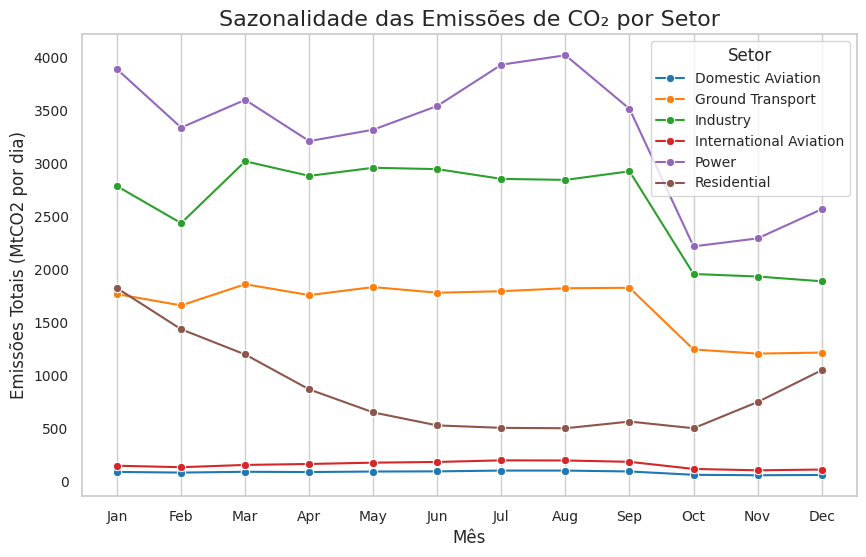

In [ ]:

df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")


df["month"] = df["date"].dt.month


monthly_emissions = df.groupby(["month", "sector"])["MtCO2 per day"].sum().reset_index()


monthly_emissions.columns = ["Month", "Sector", "Total Emissions"]


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_emissions, x="Month", y="Total Emissions", hue="Sector", marker="o", palette="tab10")


plt.title("Sazonalidade das Emissões de CO₂ por Setor", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Emissões Totais (MtCO2 por dia)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Setor", fontsize=10, title_fontsize=12)
plt.grid(axis="y")


plt.show()

<ipython-input-93-571a27277f7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil["date"] = pd.to_datetime(df_brazil["date"], format="%d/%m/%Y")
<ipython-input-93-571a27277f7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil["month"] = df_brazil["date"].dt.month


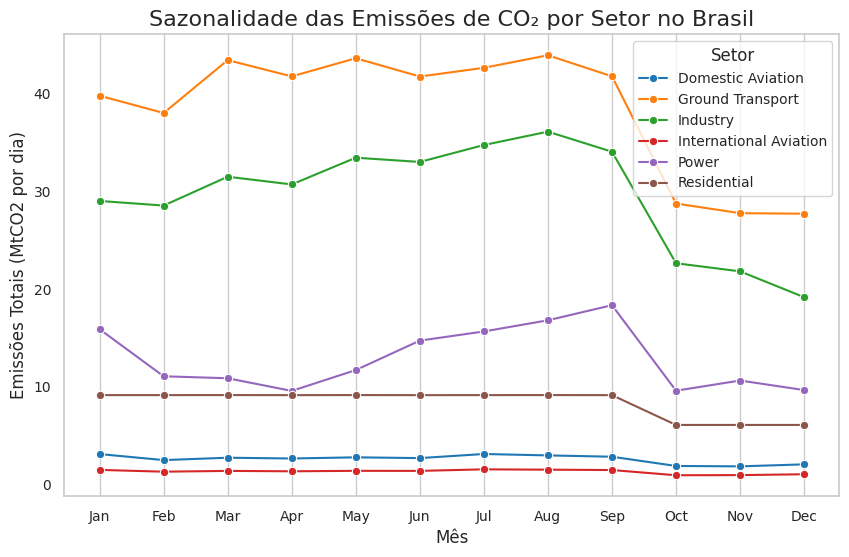

In [ ]:

df_brazil = df[df["country"] == "Brazil"]

df_brazil["date"] = pd.to_datetime(df_brazil["date"], format="%d/%m/%Y")


df_brazil["month"] = df_brazil["date"].dt.month


monthly_emissions = df_brazil.groupby(["month", "sector"])["MtCO2 per day"].sum().reset_index()


monthly_emissions.columns = ["Month", "Sector", "Total Emissions"]


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_emissions, x="Month", y="Total Emissions", hue="Sector", marker="o", palette="tab10")


plt.title("Sazonalidade das Emissões de CO₂ por Setor no Brasil", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Emissões Totais (MtCO2 por dia)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Setor", fontsize=10, title_fontsize=12)
plt.grid(axis="y")


plt.show()

## Matriz de correlação dos diferentes setores

### explicação da matriz

Esta matriz para quem não está habituado pode ser um pouco diferente, mas na prática ela é bem simples. Basicamente, os valores vão de -1 até 1, onde quanto mais próximo de algum dos extremos mais correlacionada com a outra variável ela é. Se os valores são próximos de 1, significa que os quando uma variável aumenta, a outra também aumenta, enquanto mais próximo de -1, siginifica que quanto mais uma aumenta, mais a outra diminui, colocamos estas matrizes para podermos conferir se existia alguma correlação entre energia e outra variável, mas não existe nenhum valor alto o suficiente para isto poder ser confirmado

### Explicação do código

Mais uma vez os códigos são iguais, mudando apenas que na célula do Brasil irá ter uma tabela apenas com os valores relacionados ao país. Mas quanto ao código no geral, o código analisa dados de emissões globais de CO₂, organizando-os por setores e períodos mensais. Inicialmente, as datas no DataFrame são convertidas para um formato adequado para manipulação, e uma nova coluna correspondente ao mês é criada. Em seguida, os dados são agrupados por mês e setor, somando as emissões diárias de CO₂ para obter os totais mensais por setor.

Os dados agrupados são reorganizados em uma tabela dinâmica, onde cada linha representa um mês e cada coluna corresponde a um setor, preenchendo valores ausentes com zero. Com a tabela estruturada, é calculada uma matriz de correlação para medir a relação entre as emissões dos diferentes setores ao longo do tempo.

Por fim, é gerado um mapa de calor visualizando as correlações entre os setores. Este gráfico utiliza uma paleta de cores para destacar padrões positivos e negativos, com anotações exibindo os valores numéricos de correlação. A visualização é ajustada com títulos e rótulos para facilitar a interpretação dos dados.

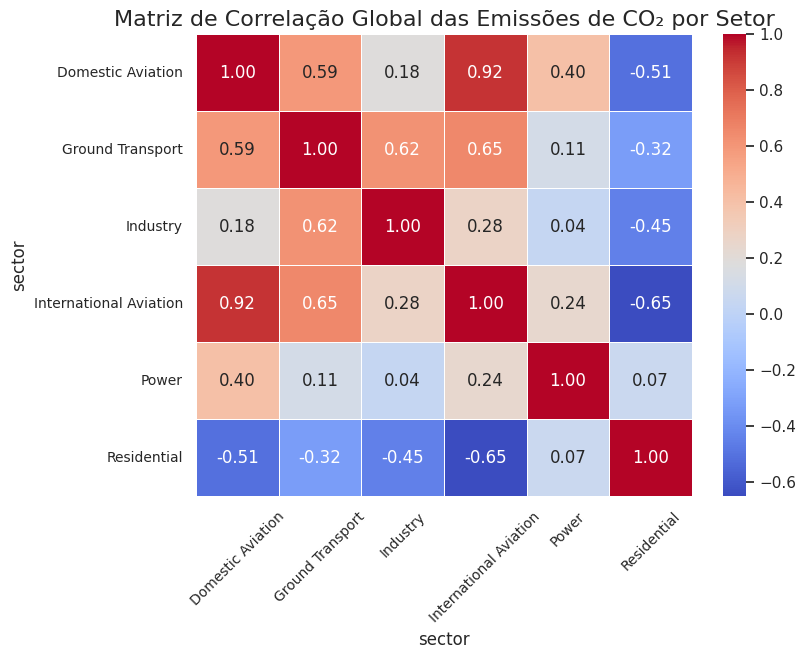

In [ ]:

df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")


df["month"] = df["date"].dt.to_period("M")


monthly_global_emissions = df.groupby(["month", "sector"])["MtCO2 per day"].sum().reset_index()


global_emissions_pivot = monthly_global_emissions.pivot(index="month", columns="sector", values="MtCO2 per day").fillna(0)


global_correlation_matrix = global_emissions_pivot.corr()


sns.set(style="white")


plt.figure(figsize=(8, 6))
sns.heatmap(global_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Matriz de Correlação Global das Emissões de CO₂ por Setor", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-95-d3317dcab083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil["date"] = pd.to_datetime(df_brazil["date"], format="%d/%m/%Y")
<ipython-input-95-d3317dcab083>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil["month"] = df_brazil["date"].dt.to_period("M")


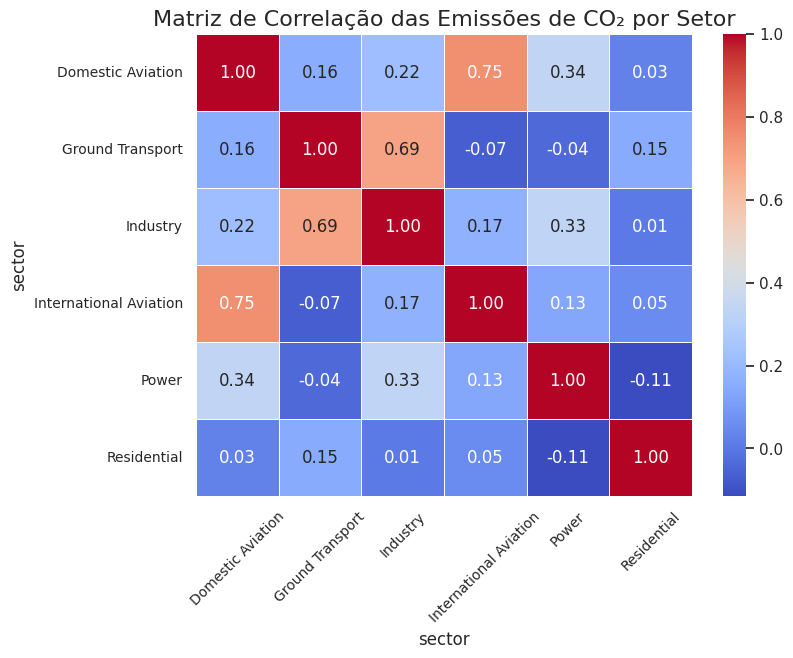

In [ ]:

df_brazil["date"] = pd.to_datetime(df_brazil["date"], format="%d/%m/%Y")


df_brazil["month"] = df_brazil["date"].dt.to_period("M")


monthly_sector_emissions = df_brazil.groupby(["month", "sector"])["MtCO2 per day"].sum().reset_index()


emissions_pivot = monthly_sector_emissions.pivot(index="month", columns="sector", values="MtCO2 per day").fillna(0)


correlation_matrix = emissions_pivot.corr()


sns.set(style="white")


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Matriz de Correlação das Emissões de CO₂ por Setor", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

## Séries temporais das emissões

### Explicação dos gráficos

Para encerrarmos o contexto de setores, trouxemos séries temporais para demonstrar a sazonalidade que foi nos mostrada lá em cima, mas também uma coisa muito interessante, no qual mesmo que pareça estar seguindo em valor contínuo as séries temporais, podemos ver mais abaixo a análise de tendência da mesma, onde ela se volta para cima, mostrando que as emissões de CO2 na atmosfera não estão diminuindo, mas sim aumentando.

### Explicação dos códigos

O código analisa a evolução das emissões globais de CO₂ ao longo do tempo e gera uma série temporal para visualização. Primeiro, os dados são agrupados pela data, somando as emissões diárias de CO₂ de todos os setores, resultando em uma nova tabela com os totais diários. Em seguida, as colunas são renomeadas para facilitar a compreensão, e os dados são ordenados cronologicamente.

Com os dados organizados, é criado um gráfico de linha para representar a série temporal. No eixo X, estão as datas, enquanto o eixo Y mostra as emissões totais de CO₂ por dia (em milhões de toneladas). O gráfico utiliza uma linha azul com espessura destacada para facilitar a visualização da tendência.

A apresentação do gráfico é refinada com título, rótulos nos eixos, e uma grade pontilhada para melhorar a legibilidade. Além disso, os rótulos do eixo X são rotacionados para evitar sobreposição e o layout é ajustado automaticamente para uma exibição mais clara. Por fim, o gráfico é exibido, permitindo a análise das variações nas emissões globais ao longo do tempo.

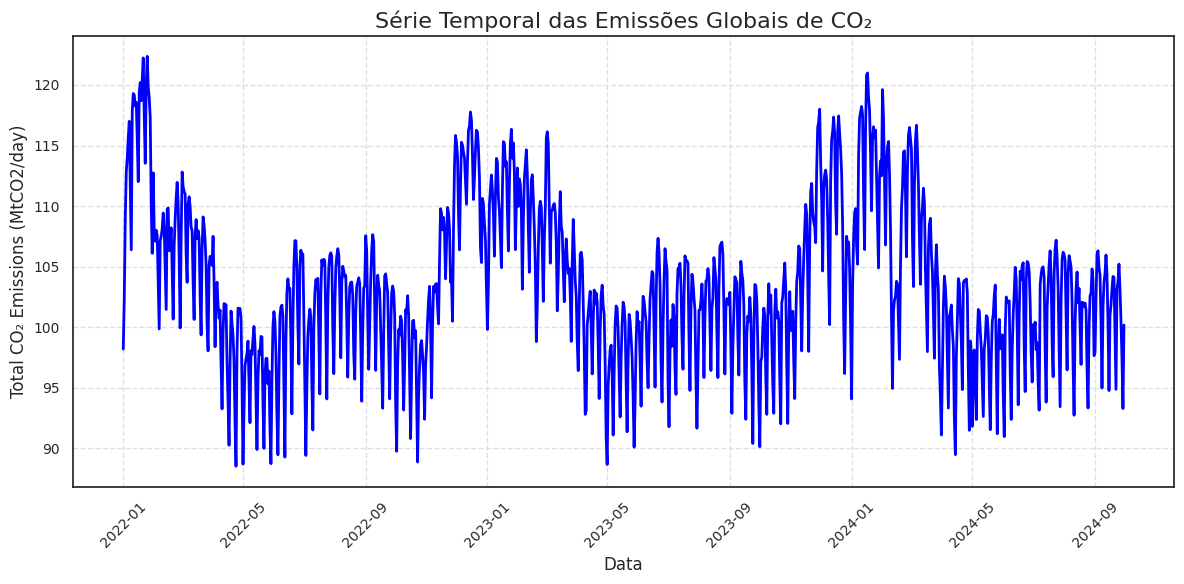

In [ ]:

global_emissions = df.groupby("date")["MtCO2 per day"].sum().reset_index()


global_emissions.columns = ["Date", "Total CO₂ Emissions (MtCO2/day)"]


global_emissions = global_emissions.sort_values(by="Date")


plt.figure(figsize=(12, 6))
plt.plot(global_emissions["Date"], global_emissions["Total CO₂ Emissions (MtCO2/day)"], color="blue", linewidth=2)


plt.title("Série Temporal das Emissões Globais de CO₂", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Total CO₂ Emissions (MtCO2/day)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


plt.show()

### explicação dos códigos com tendencia

O código realiza uma decomposição sazonal das emissões globais de CO₂ em componentes distintas, permitindo uma análise detalhada dos padrões temporais. Primeiramente, as datas são convertidas para o formato datetime e os dados são agrupados para calcular o total de emissões diárias de CO₂. Em seguida, os valores diários são agregados em totais mensais para criar uma base mais adequada à análise sazonal.

Com os dados mensais, é aplicada a técnica de decomposição sazonal utilizando um modelo aditivo, que separa a série em quatro componentes principais: a série observada (dados originais), a tendência (movimentos de longo prazo), a sazonalidade (padrões repetitivos em intervalos regulares) e o resíduo (variações não explicadas pelos outros componentes).

Os resultados são visualizados em um gráfico com quatro subplots. A série observada exibe os valores mensais originais, enquanto a tendência mostra a direção geral das emissões ao longo do tempo. A sazonalidade destaca padrões cíclicos, como flutuações recorrentes em determinados períodos do ano. Por fim, o resíduo ilustra as irregularidades ou ruídos na série. Cada gráfico inclui título, legenda e ajustes no layout para facilitar a interpretação dos dados.

<ipython-input-97-156803bf0138>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  global_monthly = global_emissions.resample('M', on="Date").sum().reset_index()


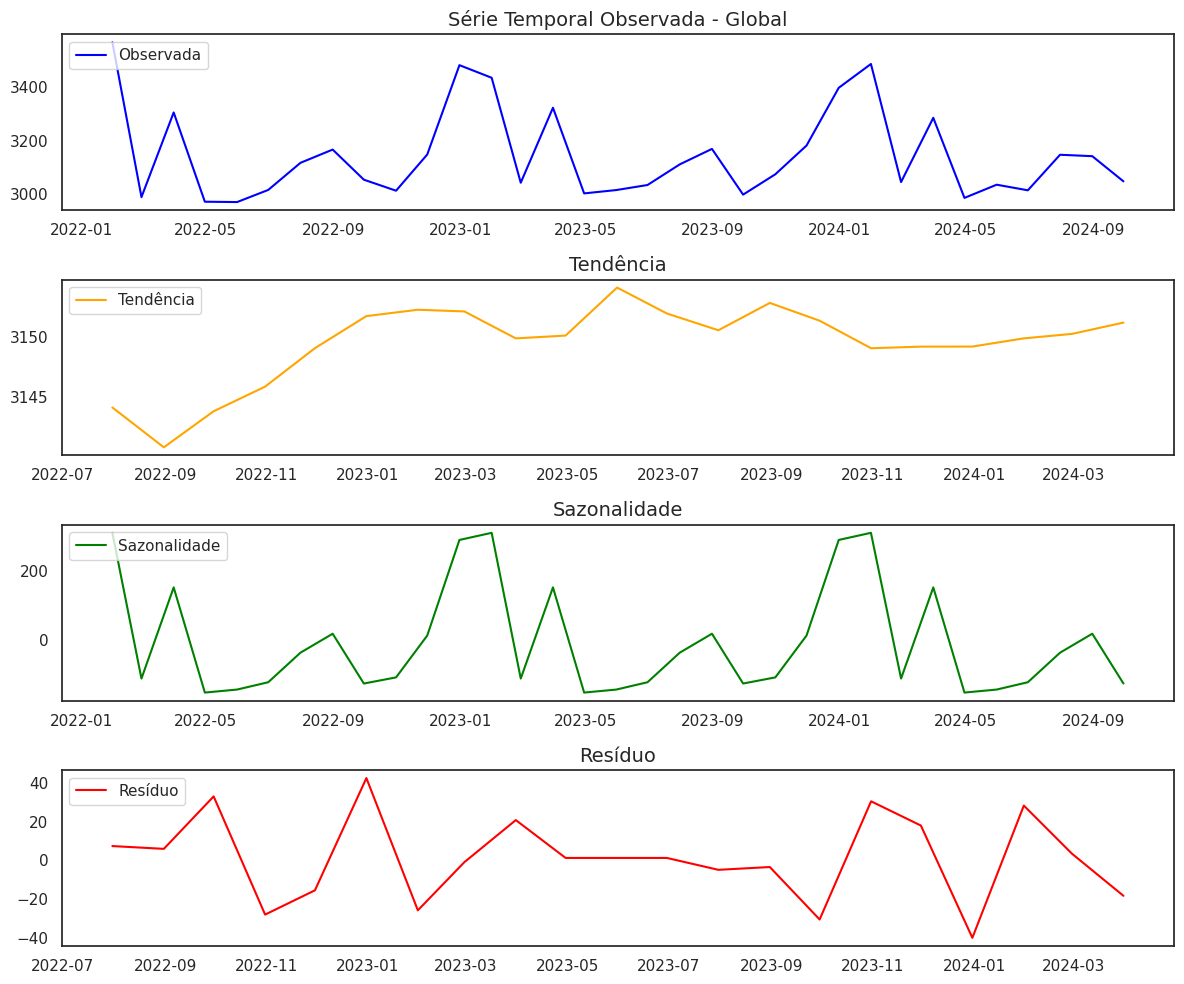

In [ ]:

df["date"] = pd.to_datetime(df["date"])
global_emissions = df.groupby("date")["MtCO2 per day"].sum().reset_index()


global_emissions.columns = ["Date", "Total CO₂ Emissions (MtCO2/day)"]


global_monthly = global_emissions.resample('M', on="Date").sum().reset_index()


decomposition_global = seasonal_decompose(global_monthly["Total CO₂ Emissions (MtCO2/day)"],
                                          model="additive",
                                          period=12)


plt.figure(figsize=(12, 10))

# Série original
plt.subplot(411)
plt.plot(global_monthly["Date"], decomposition_global.observed, label="Observada", color="blue")
plt.title("Série Temporal Observada - Global", fontsize=14)
plt.legend(loc="upper left")

# Tendência
plt.subplot(412)
plt.plot(global_monthly["Date"], decomposition_global.trend, label="Tendência", color="orange")
plt.title("Tendência", fontsize=14)
plt.legend(loc="upper left")

# Sazonalidade
plt.subplot(413)
plt.plot(global_monthly["Date"], decomposition_global.seasonal, label="Sazonalidade", color="green")
plt.title("Sazonalidade", fontsize=14)
plt.legend(loc="upper left")

# Resíduo
plt.subplot(414)
plt.plot(global_monthly["Date"], decomposition_global.resid, label="Resíduo", color="red")
plt.title("Resíduo", fontsize=14)
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


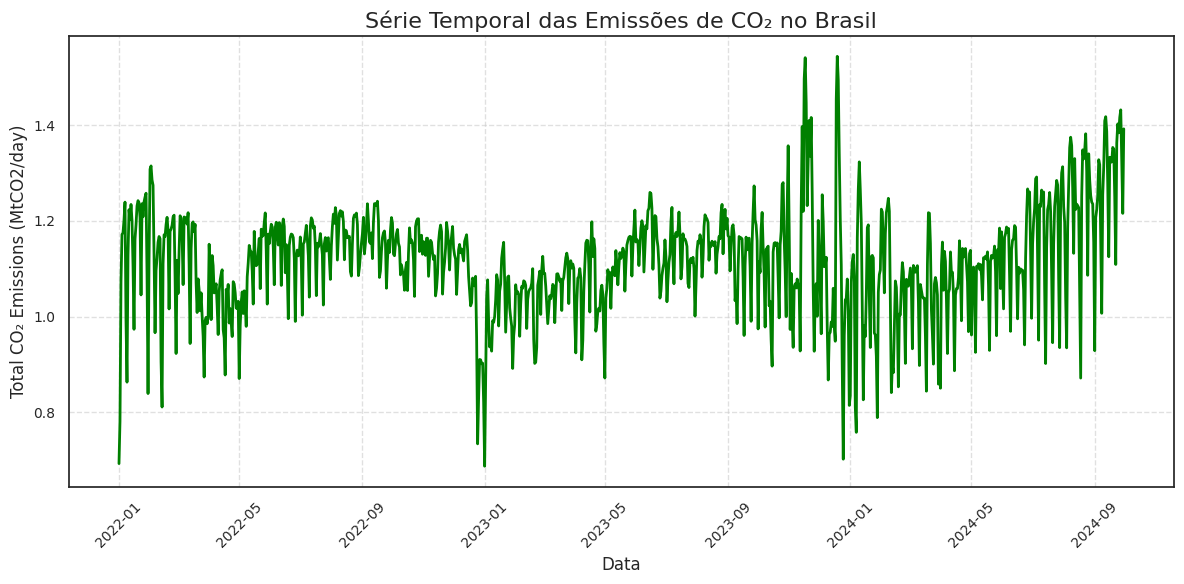

In [ ]:
# Filtrar dados para o Brasil
brazil_emissions = df[df["country"] == "Brazil"]

# Agrupar dados por data
brazil_emissions = brazil_emissions.groupby("date")["MtCO2 per day"].sum().reset_index()

# Renomear colunas para facilitar a leitura
brazil_emissions.columns = ["Date", "Total CO₂ Emissions (MtCO2/day)"]

# Ordenar por data (caso ainda não esteja)
brazil_emissions = brazil_emissions.sort_values(by="Date")

# Criar o gráfico de série temporal para o Brasil
plt.figure(figsize=(12, 6))
plt.plot(brazil_emissions["Date"], brazil_emissions["Total CO₂ Emissions (MtCO2/day)"], color="green", linewidth=2)

# Personalizar o gráfico
plt.title("Série Temporal das Emissões de CO₂ no Brasil", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Total CO₂ Emissions (MtCO2/day)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Exibir o gráfico
plt.show()

<ipython-input-99-71df655913e3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brazil_monthly = brazil_emissions.resample('M', on="Date").sum().reset_index()


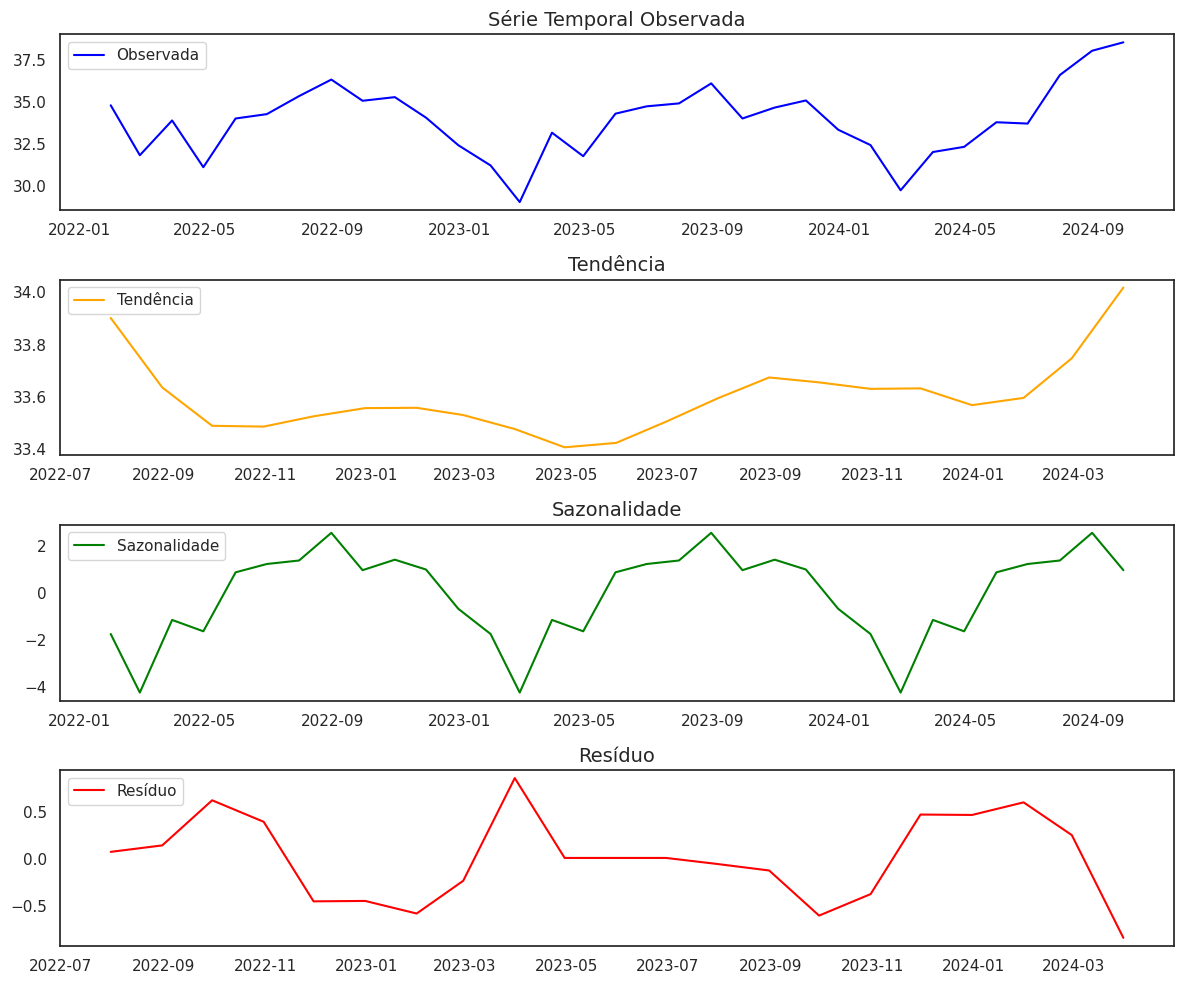

In [ ]:
brazil_emissions["Date"] = pd.to_datetime(brazil_emissions["Date"])
brazil_monthly = brazil_emissions.resample('M', on="Date").sum().reset_index()

# Decompor a série temporal
decomposition = seasonal_decompose(brazil_monthly["Total CO₂ Emissions (MtCO2/day)"],
                                    model="additive",
                                    period=12)

# Plotar os componentes da decomposição
plt.figure(figsize=(12, 10))

# Série original
plt.subplot(411)
plt.plot(brazil_monthly["Date"], decomposition.observed, label="Observada", color="blue")
plt.title("Série Temporal Observada", fontsize=14)
plt.legend(loc="upper left")

# Tendência
plt.subplot(412)
plt.plot(brazil_monthly["Date"], decomposition.trend, label="Tendência", color="orange")
plt.title("Tendência", fontsize=14)
plt.legend(loc="upper left")

# Sazonalidade
plt.subplot(413)
plt.plot(brazil_monthly["Date"], decomposition.seasonal, label="Sazonalidade", color="green")
plt.title("Sazonalidade", fontsize=14)
plt.legend(loc="upper left")

# Resíduo
plt.subplot(414)
plt.plot(brazil_monthly["Date"], decomposition.resid, label="Resíduo", color="red")
plt.title("Resíduo", fontsize=14)
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

## Início da análise focada

### Explicação dos gráficos

Daqui para frente todos os códigos são semelhantes, mudando apenas os resultados pois está focado nos 2 países mais poluentes do mundo, trazendo dados desde os anos 2000 até agora.
O primeiro gráfico de cada país retrata a principal fonte de energia de cada um deles, mostrando que por mais que as análises feitas anteriormente que o setor mais poluente do mundo é o energético, nem a china e nem os estados unidos mudaram sua forma de geração elétrica.<br>
Já no segundo gráfico, podemos ver a série temporal de emissão de CO2 por país, onde diferente do primeiro mostrado lá em cima, a china mostra um constante aumento na emissão e os EUA, diferente dela, está reduzindo as taxas, porém, ainda sim não e o suficiente, pois podemos ver que a principal fonte de energia do mesmo, trata-se de energias nossivas, quanto o Brasil, teve um pico nos últimos anos, mas parece que já está diminuindo sua taxa de emissão.<br>
o 3° gráfico faz um comparativo com a principal fonte de energia do país com as fontes renováveis, enquanto a China e os Estados Unidos apresentam uma diferença enorme utilizando energias poluentes, o Brasil mostra uma predominância muito alta de energias renováveis em suas atividades<br>
E por fim, o quarto gráfico faz uma comparação entre um tipo de combustível e o crescimento populacional, onde podemos comparar que o aumento das taxas de emissões, podem sim estar conectados a superlotação do planeta. A China apresenta um aumento equilibrado entre os dois, mostrando que quanto mais a população aumenta, mais a taxa de emissão vai com ela, assim como no Brasi. Já nos Estados Unidos isto pode ser confirmado, baseado que o aumento populacional está desacelerado e a taxa também está diminuindo.<br>

### Explicação do código

1 - O código analisa o consumo total de energia por fonte no páis a partir do ano 2000, utilizando dados de um arquivo Excel. Após filtrar o país e as fontes de energia específicas, os consumos são somados para cada tipo de fonte, como carvão, gás, petróleo, renováveis e nuclear. Os resultados são visualizados em um gráfico de barras ordenado, destacando as contribuições relativas de cada fonte, com cores distintas para facilitar a interpretação. O gráfico inclui título, rótulos nos eixos e ajustes de layout para melhor apresentação, evidenciando a predominância de fontes fósseis no consumo energético chinês.<br>
2 - O código analisa as emissões de gases de efeito estufa no país ao longo dos anos, criando uma série temporal. Os dados são filtrados para o país, agrupados por ano e somados para calcular as emissões totais anuais de CO₂ em milhões de toneladas. Após renomear as colunas e ordenar os dados cronologicamente, é gerado um gráfico de linha com as emissões ao longo do tempo. O gráfico utiliza uma linha vermelha para destacar as variações, com título, rótulos nos eixos, grade pontilhada e ajustes no layout para garantir clareza e facilitar a interpretação dos dados.<br>
3 - O código compara o consumo de energia predominante com o consumo de fontes renováveis no país ao longo dos anos, gerando uma análise temporal. Após filtrar os dados para o país e selecionar as fontes de energia relevantes, os valores anuais são somados e uma nova coluna é criada para identificar a fonte predominante entre carvão, gás e petróleo em cada ano. Em seguida, são plotados dois gráficos de linha: um representando a fonte de energia predominante (inicialmente o carvão) e outro para as fontes renováveis, destacando sua evolução. O gráfico inclui título, rótulos nos eixos, legenda e ajustes visuais para destacar a relação entre as fontes predominantes e o crescimento das energias renováveis. <br>
4 - O código analisa a relação entre o crescimento populacional e o consumo de combustíveis fósseis na China, criando um gráfico de dispersão com uma linha de tendência. Após filtrar os dados para o país e selecionar as colunas de interesse (ano, população e consumo de combustíveis fósseis), os valores ausentes são removidos para garantir a consistência da análise. O gráfico de dispersão exibe pontos representando os dados anuais, com tamanhos e transparências ajustados para facilitar a visualização. Uma linha de regressão é sobreposta para evidenciar a tendência entre as variáveis, e o gráfico é personalizado com título, rótulos nos eixos, grade e layout ajustado para clareza.







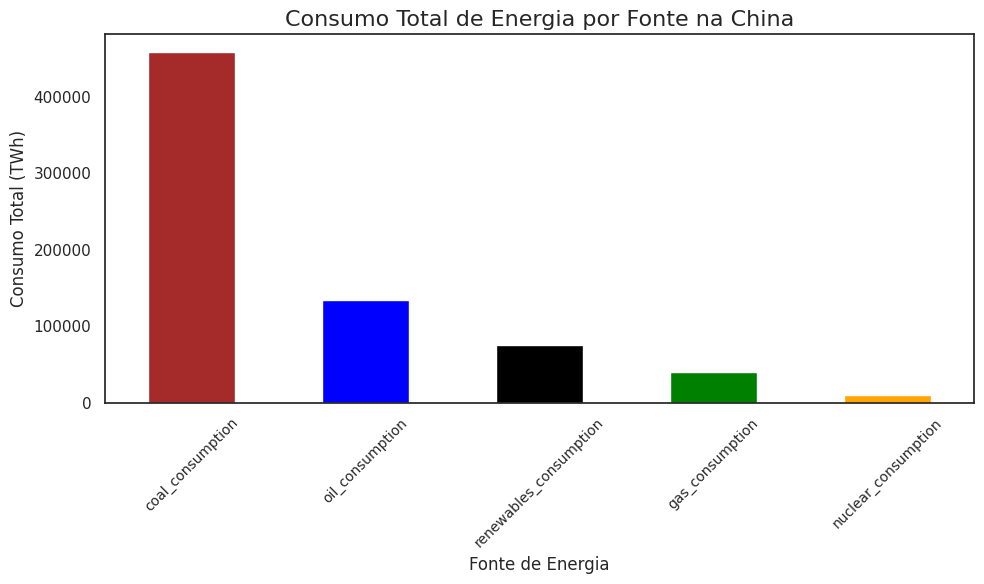

In [ ]:

df = pd.read_excel("owid-energy-data.xlsx")

df = df[df["year"] >= 2000]
df = df.fillna(0)


china_energy = df[df['country'] == 'China']


energy_sources = [
    'coal_consumption', 'gas_consumption', 'oil_consumption',
    'renewables_consumption', 'nuclear_consumption'
]


china_energy_summary = china_energy[energy_sources].sum()


plt.figure(figsize=(10, 6))
china_energy_summary.sort_values(ascending=False).plot(kind='bar', color=['brown', 'blue', 'black', 'green', 'orange'])


plt.title('Consumo Total de Energia por Fonte na China', fontsize=16)
plt.ylabel('Consumo Total (TWh)', fontsize=12)
plt.xlabel('Fonte de Energia', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()


plt.show()

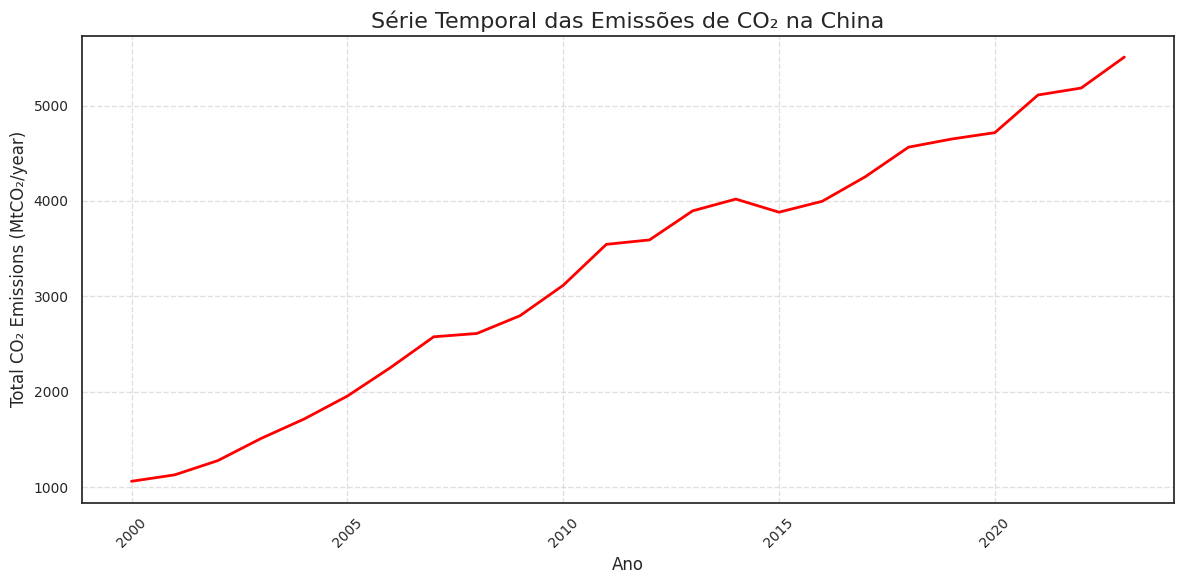

In [ ]:

china_emissions = df[df["country"] == "China"]


china_emissions = china_emissions.groupby("year")["greenhouse_gas_emissions"].sum().reset_index()


china_emissions.columns = ["Year", "Total CO₂ Emissions (MtCO2/year)"]


china_emissions = china_emissions.sort_values(by="Year")


plt.figure(figsize=(12, 6))
plt.plot(china_emissions["Year"], china_emissions["Total CO₂ Emissions (MtCO2/year)"], color="red", linewidth=2)


plt.title("Série Temporal das Emissões de CO₂ na China", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total CO₂ Emissions (MtCO₂/year)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


plt.show()

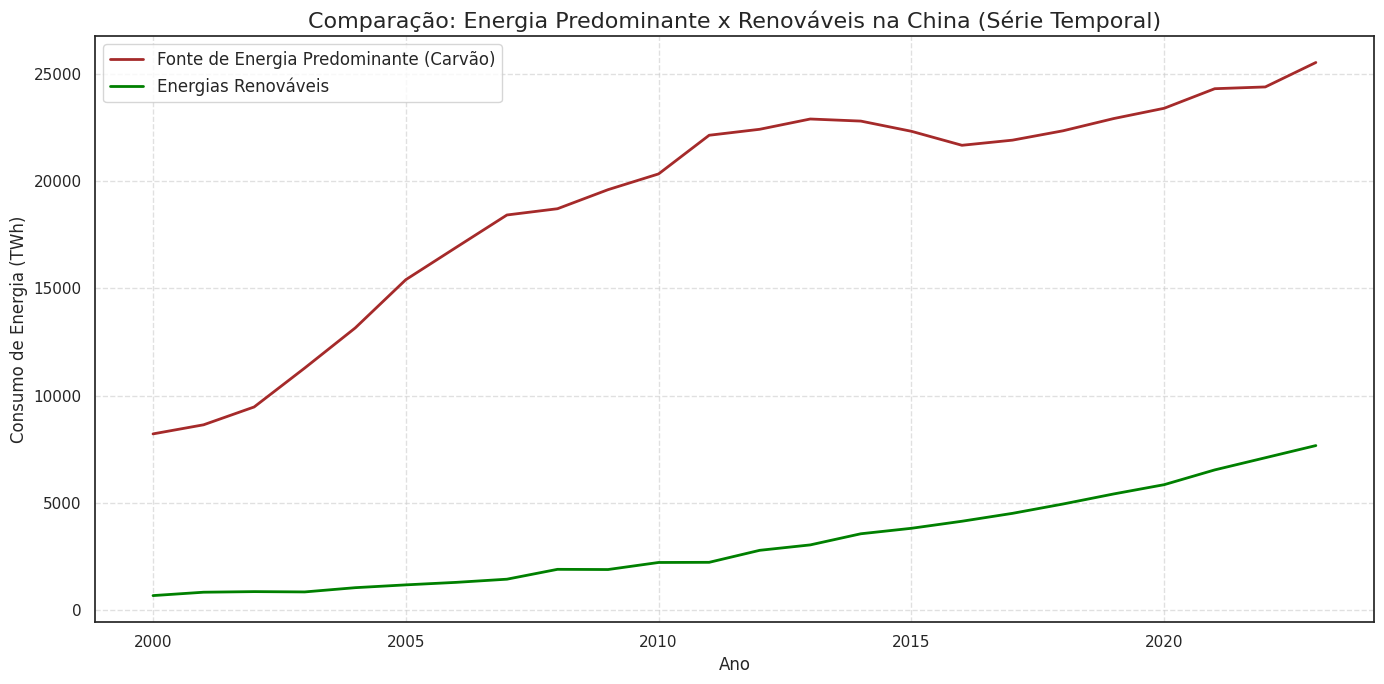

In [ ]:


china_energy = df[df['country'] == 'China']


energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption']
china_energy_time = china_energy[['year'] + energy_sources].groupby('year').sum()


china_energy_time['most_used_energy'] = china_energy_time[energy_sources[:-1]].idxmax(axis=1)


plt.figure(figsize=(14, 7))


plt.plot(
    china_energy_time.index,
    china_energy_time[china_energy_time['most_used_energy'].iloc[0]],
    label='Fonte de Energia Predominante (Carvão)', color='brown', linewidth=2
)


plt.plot(
    china_energy_time.index,
    china_energy_time['renewables_consumption'],
    label='Energias Renováveis', color='green', linewidth=2
)


plt.title('Comparação: Energia Predominante x Renováveis na China (Série Temporal)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Consumo de Energia (TWh)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()

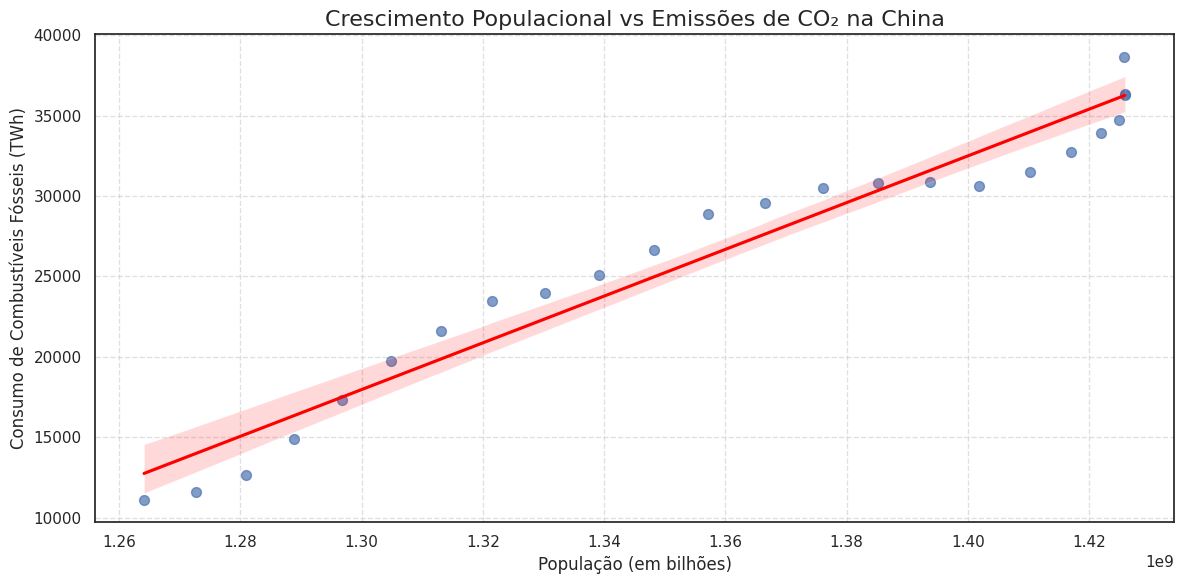

In [ ]:

china_data = df[df['country'] == 'China']


china_data = china_data[['year', 'population', 'fossil_fuel_consumption']].dropna()


plt.figure(figsize=(12, 6))
sns.regplot(
    x=china_data['population'],
    y=china_data['fossil_fuel_consumption'],
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'}
)


plt.title('Crescimento Populacional vs Emissões de CO₂ na China', fontsize=16)
plt.xlabel('População (em bilhões)', fontsize=12)
plt.ylabel('Consumo de Combustíveis Fósseis (TWh)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()

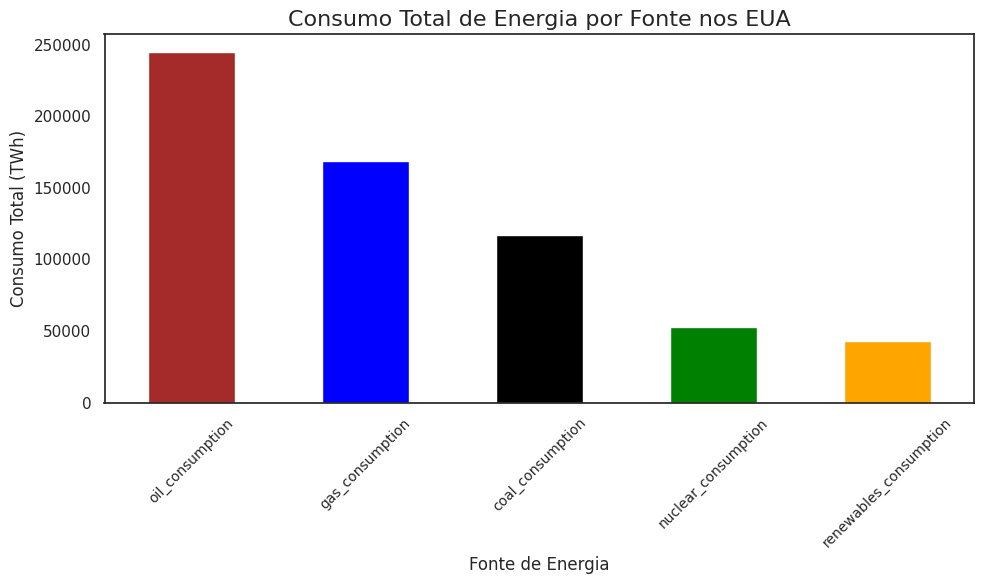

In [ ]:

EUA_energy = df[df['country'] == 'United States']


energy_sources = [
    'coal_consumption', 'gas_consumption', 'oil_consumption',
    'renewables_consumption', 'nuclear_consumption'
]


EUA_energy_summary = EUA_energy[energy_sources].sum()


plt.figure(figsize=(10, 6))
EUA_energy_summary.sort_values(ascending=False).plot(kind='bar', color=['brown', 'blue', 'black', 'green', 'orange'])


plt.title('Consumo Total de Energia por Fonte nos EUA', fontsize=16)
plt.ylabel('Consumo Total (TWh)', fontsize=12)
plt.xlabel('Fonte de Energia', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()


plt.show()

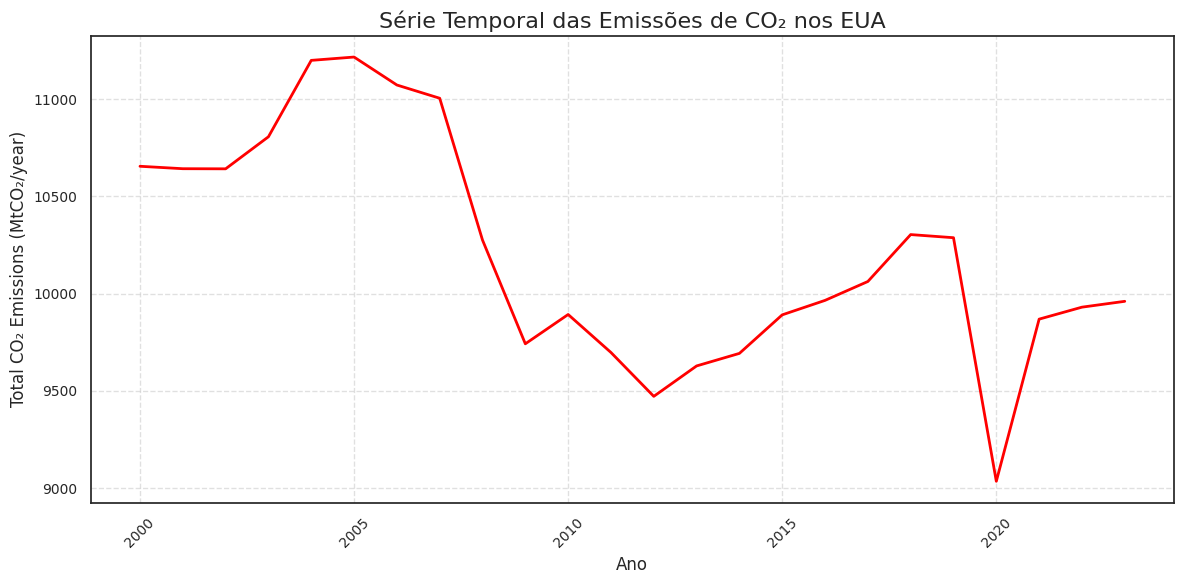

In [ ]:

EUA_emissions = df[df["country"] == "United States"]


EUA_emissions = EUA_emissions.groupby("year")["oil_consumption"].sum().reset_index()


EUA_emissions.columns = ["Year", "Total CO₂ Emissions (MtCO2/year)"]


EUA_emissions = EUA_emissions.sort_values(by="Year")


plt.figure(figsize=(12, 6))
plt.plot(EUA_emissions["Year"], EUA_emissions["Total CO₂ Emissions (MtCO2/year)"], color="red", linewidth=2)


plt.title("Série Temporal das Emissões de CO₂ nos EUA", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total CO₂ Emissions (MtCO₂/year)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


plt.show()

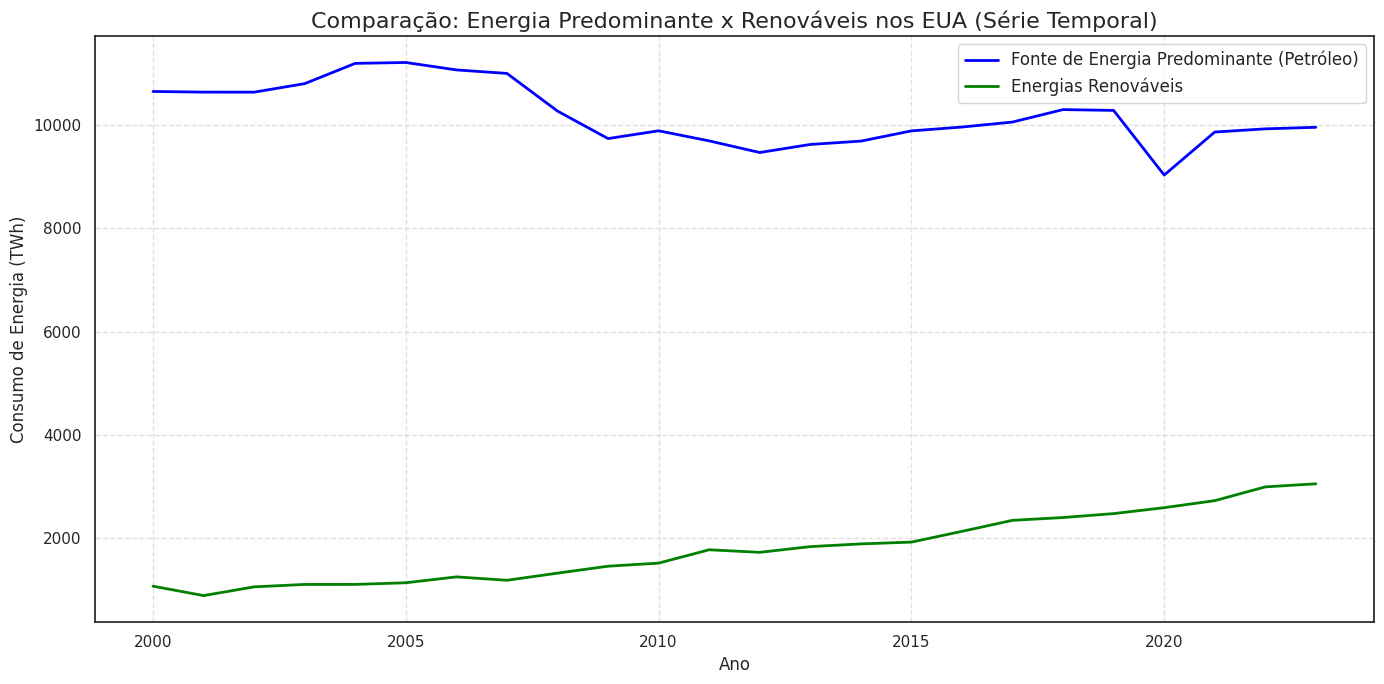

In [ ]:

usa_energy = df[df['country'] == 'United States']


energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption']
usa_energy_time = usa_energy[['year'] + energy_sources].groupby('year').sum()


usa_energy_time['most_used_energy'] = usa_energy_time[energy_sources[:-1]].idxmax(axis=1)


plt.figure(figsize=(14, 7))


plt.plot(
    usa_energy_time.index,
    usa_energy_time[usa_energy_time['most_used_energy'].iloc[0]],
    label='Fonte de Energia Predominante (Petróleo)', color='blue', linewidth=2
)


plt.plot(
    usa_energy_time.index,
    usa_energy_time['renewables_consumption'],
    label='Energias Renováveis', color='green', linewidth=2
)


plt.title('Comparação: Energia Predominante x Renováveis nos EUA (Série Temporal)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Consumo de Energia (TWh)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir o gráfico
plt.show()

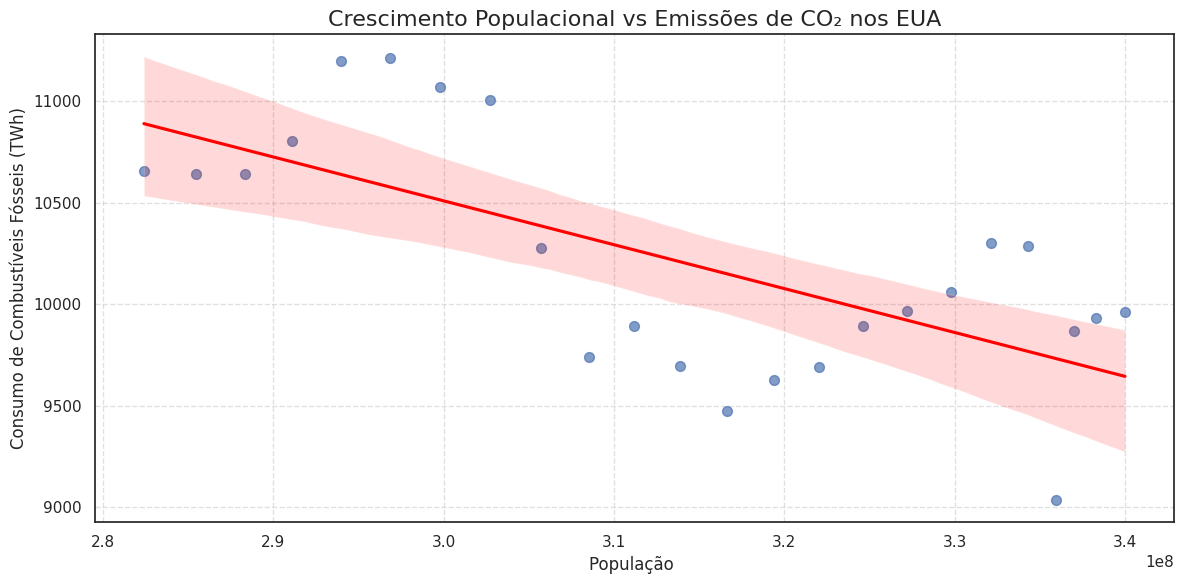

In [ ]:

EUA_data = df[df['country'] == 'United States']


EUA_data = EUA_data[['year', 'population', 'oil_consumption']].dropna()


plt.figure(figsize=(12, 6))
sns.regplot(
    x=EUA_data['population'],
    y=EUA_data['oil_consumption'],
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'}
)


plt.title('Crescimento Populacional vs Emissões de CO₂ nos EUA', fontsize=16)
plt.xlabel('População ', fontsize=12)
plt.ylabel('Consumo de Combustíveis Fósseis (TWh)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()

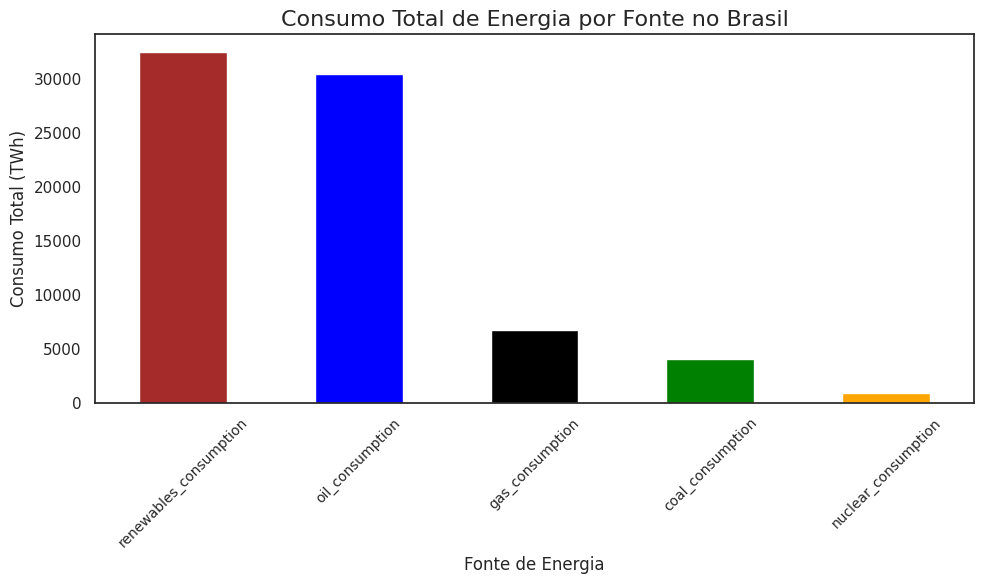

In [ ]:

br_energy = df[df['country'] == 'Brazil']


energy_sources = [
    'coal_consumption', 'gas_consumption', 'oil_consumption',
    'renewables_consumption', 'nuclear_consumption'
]


br_energy_summary = br_energy[energy_sources].sum()


plt.figure(figsize=(10, 6))
br_energy_summary.sort_values(ascending=False).plot(kind='bar', color=['brown', 'blue', 'black', 'green', 'orange'])


plt.title('Consumo Total de Energia por Fonte no Brasil', fontsize=16)
plt.ylabel('Consumo Total (TWh)', fontsize=12)
plt.xlabel('Fonte de Energia', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()


plt.show()

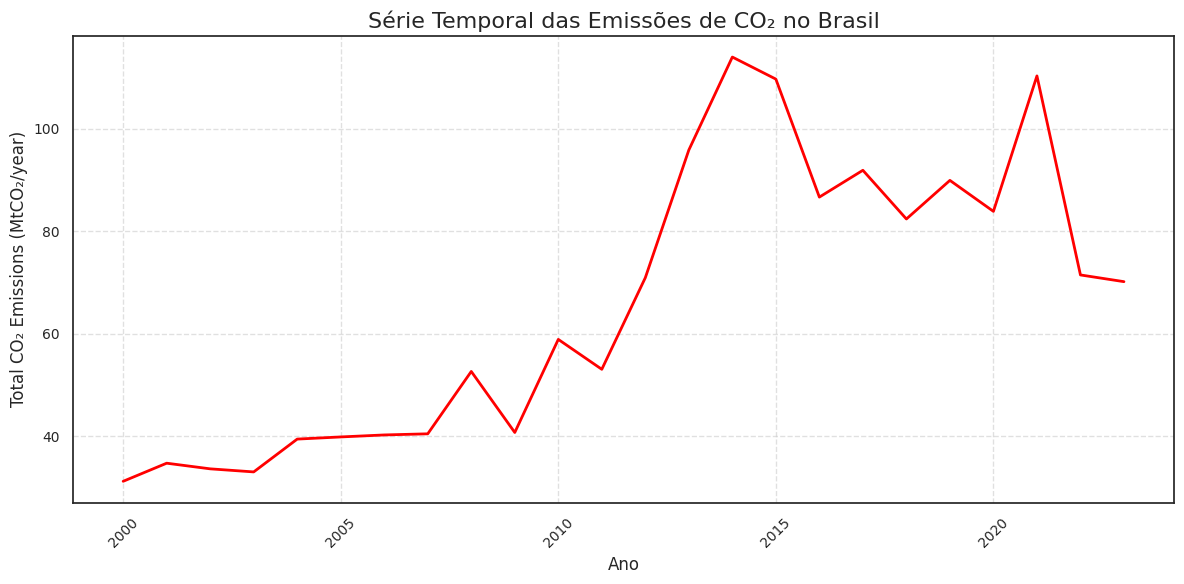

In [ ]:

br_emissions = df[df["country"] == "Brazil"]


br_emissions = br_emissions.groupby("year")["greenhouse_gas_emissions"].sum().reset_index()


br_emissions.columns = ["Year", "Total CO₂ Emissions (MtCO2/year)"]


br_emissions = br_emissions.sort_values(by="Year")


plt.figure(figsize=(12, 6))
plt.plot(br_emissions["Year"], br_emissions["Total CO₂ Emissions (MtCO2/year)"], color="red", linewidth=2)


plt.title("Série Temporal das Emissões de CO₂ no Brasil", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total CO₂ Emissions (MtCO₂/year)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


plt.show()

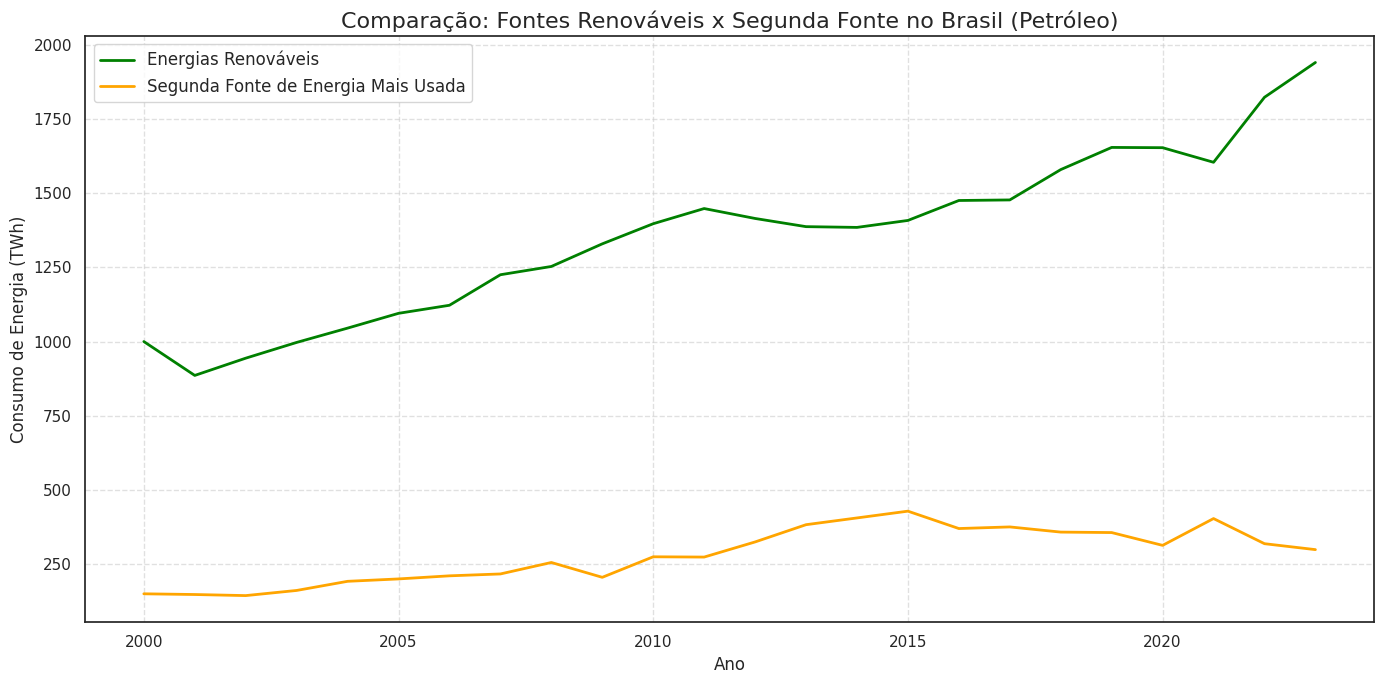

In [ ]:

brazil_energy = df[df['country'] == 'Brazil']


energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption']
brazil_energy_time = brazil_energy[['year'] + energy_sources].groupby('year').sum()


brazil_energy_time['second_most_used_value'] = brazil_energy_time[energy_sources[:-1]].apply(
    lambda row: row.nlargest(2).iloc[-1], axis=1
)

brazil_energy_time['second_most_used_source'] = brazil_energy_time[energy_sources[:-1]].apply(
    lambda row: row.nlargest(2).idxmin(), axis=1
)


plt.figure(figsize=(14, 7))


plt.plot(
    brazil_energy_time.index,
    brazil_energy_time['renewables_consumption'],
    label='Energias Renováveis', color='green', linewidth=2
)


plt.plot(
    brazil_energy_time.index,
    brazil_energy_time['second_most_used_value'],
    label='Segunda Fonte de Energia Mais Usada', color='orange', linewidth=2
)


plt.title('Comparação: Fontes Renováveis x Segunda Fonte no Brasil (Petróleo)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Consumo de Energia (TWh)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()


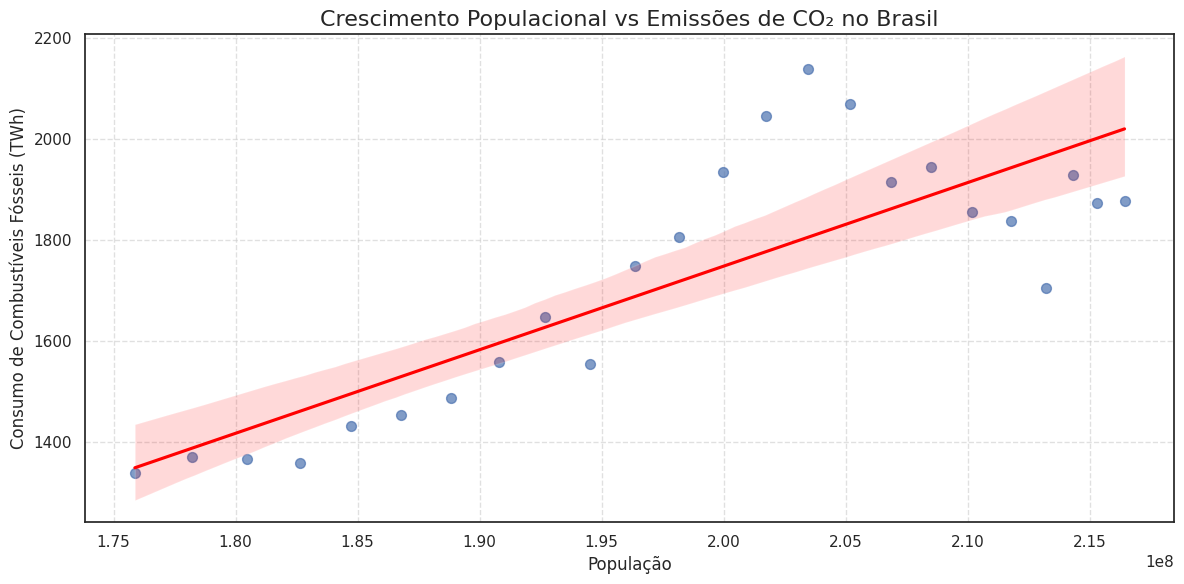

In [ ]:

br_data = df[df['country'] == 'Brazil']


br_data = br_data[['year', 'population', 'fossil_fuel_consumption']].dropna()


plt.figure(figsize=(12, 6))
sns.regplot(
    x=br_data['population'],
    y=br_data['fossil_fuel_consumption'],
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'}
)


plt.title('Crescimento Populacional vs Emissões de CO₂ no Brasil', fontsize=16)
plt.xlabel('População', fontsize=12)
plt.ylabel('Consumo de Combustíveis Fósseis (TWh)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()

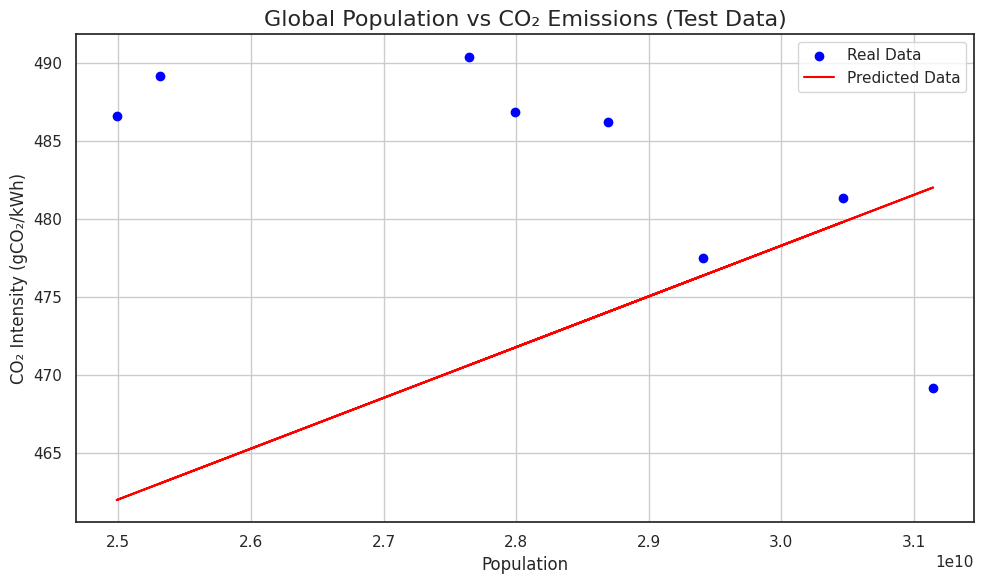

In [ ]:
df = pd.read_excel("owid-energy-data.xlsx")
df_filtered = df[["year", "country", "population", "carbon_intensity_elec"]]
df_filtered = df_filtered[df_filtered["year"] >= 2000]
df_filtered = df_filtered.dropna(subset=["population", "carbon_intensity_elec"])

df_global = df_filtered.groupby("year").agg(
    {"population": "sum", "carbon_intensity_elec": "mean"}
).reset_index()

X = df_global[["population"]]
y = df_global["carbon_intensity_elec"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Real Data")
plt.plot(X_test, y_pred, color="red", label="Predicted Data")
plt.title("Global Population vs CO₂ Emissions (Test Data)", fontsize=16)
plt.xlabel("Population", fontsize=12)
plt.ylabel("CO₂ Intensity (gCO₂/kWh)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




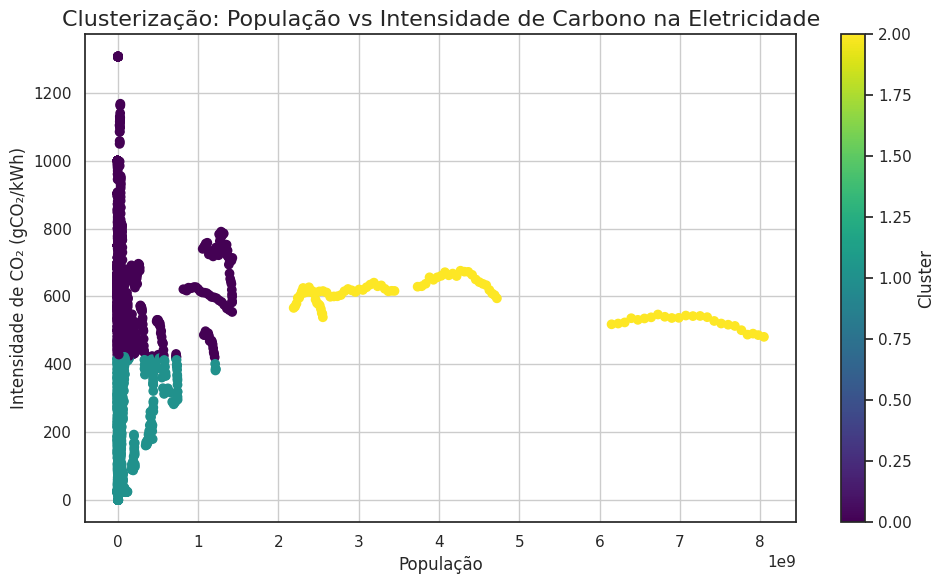

In [ ]:
# Carregar os dados
df = pd.read_excel("owid-energy-data.xlsx")
df_filtered = df[["year", "country", "population", "carbon_intensity_elec"]]
df_filtered = df_filtered[df_filtered["year"] >= 2000]
df_filtered = df_filtered.dropna(subset=["population", "carbon_intensity_elec"])

# Preparar os dados para o KMeans
df_filtered = df_filtered[["population", "carbon_intensity_elec"]]

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Definir o número de clusters (por exemplo, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualização do KMeans
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered["population"], df_filtered["carbon_intensity_elec"], c=df_filtered['Cluster'], cmap='viridis')
plt.title("Clusterização: População vs Intensidade de Carbono na Eletricidade", fontsize=16)
plt.xlabel("População", fontsize=12)
plt.ylabel("Intensidade de CO₂ (gCO₂/kWh)", fontsize=12)
plt.colorbar(label="Cluster")
plt.grid()
plt.tight_layout()
plt.show()


## Conclusão

Apesar dos avanços nas políticas ambientais, é essencial que começemos a nos importar genuinamente com o futuro do nosso planeta. A produção de CO₂ continua em ascensão, e as grandes potências globais ainda estão distantes de adotar as energias renováveis como sua principal fonte energética. Não podemos continuar ignorando que este não é apenas "um planeta descartável".

O mundo está cada vez mais superlotado, e a geração de energia sustentável não acompanha esse crescimento. Se não tomarmos medidas imediatas e eficazes, podemos estar condenados a viver em um ambiente onde as condições para a vida se tornam cada vez mais difíceis e insustentáveis.

Agora é o momento de agir. O futuro do nosso planeta depende de nossa capacidade de transformar nossa matriz energética e adotar, de forma eficaz, fontes limpas e renováveis. Não podemos esperar mais. Nossa casa está em risco, e a conta que está sendo cobrada por décadas de negligência não pode ser ignorada.